Importing the libraries and the csv file

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from matplotlib.colors import ListedColormap

c = ['#8a3ffc', '#33b1ff', '#007d79', '#ff7eb6', '#fa4d56', '#6fdc8c', '#d12771', '#d2a106', '#ba4e00', '#d4bbff']
col = ListedColormap(sns.color_palette(c).as_hex())

In [ ]:
df = pd.read_csv('./data/lyrics_def_noDupl.csv')
df

,song,year,artist,genre,lyrics,language
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",en
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",en
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,en
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",en
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",en
...,...,...,...,...,...,...
189388,swingin-door,2012,edens-edge,Country,"You've got your Texas way of walking,\nYou've ...",en
189389,who-am-i-drinking-tonight,2012,edens-edge,Country,"I gotta say\nBoy, after only just a couple of ...",en
189390,last-supper,2012,edens-edge,Country,Look at the couple in the corner booth\nLooks ...,en
189391,christ-alone-live-in-studio,2012,edens-edge,Country,When I fly off this mortal earth\nAnd I'm meas...,en


Drop the column language

In [ ]:
df = df.drop('language', axis=1)
df

,song,year,artist,genre,lyrics
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."
...,...,...,...,...,...
189388,swingin-door,2012,edens-edge,Country,"You've got your Texas way of walking,\nYou've ..."
189389,who-am-i-drinking-tonight,2012,edens-edge,Country,"I gotta say\nBoy, after only just a couple of ..."
189390,last-supper,2012,edens-edge,Country,Look at the couple in the corner booth\nLooks ...
189391,christ-alone-live-in-studio,2012,edens-edge,Country,When I fly off this mortal earth\nAnd I'm meas...


In [ ]:
df.isna().any().sum()

0

In [ ]:
(df.duplicated() == True).sum()

0

In [ ]:
len(df)

189393

In [ ]:
df.drop(df[df.year < 1968].index, inplace=True)
## The dataset contains 6 records with inconsistent year values

In [ ]:
df.reset_index(drop=True, inplace=True)

Song distribution by year

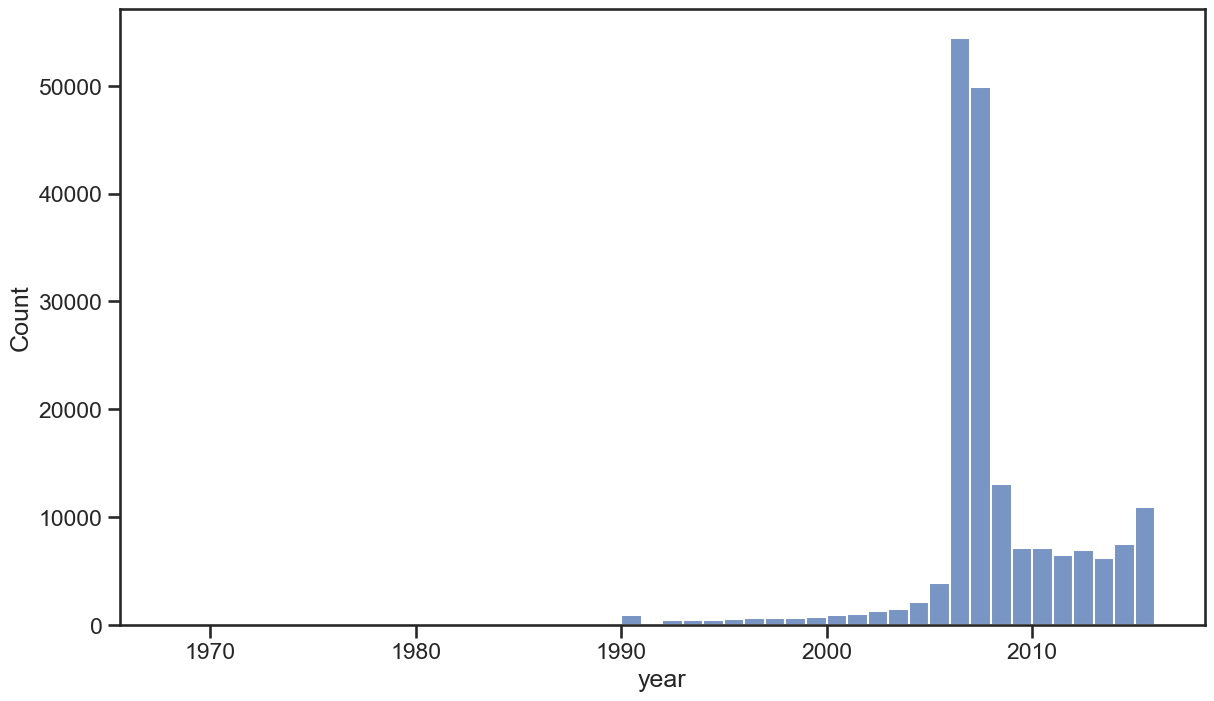

In [ ]:
sns.set_theme(style="ticks")
sns.set_context("talk")
fig, ax0 = plt.subplots(figsize = (14,8))
sns.histplot(data=df, x='year', shrink=1, binwidth=1, palette=c)
plt.show()

Some exploration on artist

In [ ]:
df['artist'].nunique()

8937

In [ ]:
pd.set_option('display.max_rows', None)
df['artist'].value_counts()

dolly-parton                                           648
elton-john                                             572
chris-brown                                            496
bee-gees                                               466
eminem                                                 462
elvis-costello                                         452
bob-dylan                                              437
david-bowie                                            434
barbra-streisand                                       432
frank-zappa                                            409
eddy-arnold                                            406
bill-anderson                                          400
bruce-springsteen                                      398
b-b-king                                               394
dean-martin                                            392
chumbawamba                                            383
chamillionaire                                         3

In [ ]:
df['artist'][df['genre'] == 'Country'].value_counts()

dolly-parton                        648
eddy-arnold                         406
bill-anderson                       400
emmylou-harris                      297
buck-owens                          260
ernest-tubb                         236
don-williams                        232
ferlin-husky                        224
alan-jackson                        222
chris-ledoux                        211
bobby-bare                          207
connie-smith                        187
charley-pride                       184
cowboy-junkies                      180
bill-monroe                         175
david-allan-coe                     171
dwight-yoakam                       170
george-strait                       165
flatt-and-scruggs                   156
george-jones                        153
garth-brooks                        153
brad-paisley                        150
alison-krauss                       139
blake-shelton                       118
clint-black                         109


Class distribution

In [ ]:
df['genre'].value_counts()

Rock          89998
Pop           28759
Metal         20658
Hip-Hop       20166
Country       11708
Electronic     6167
Jazz           4833
Indie          2777
R&B            2733
Folk           1589
Name: genre, dtype: int64

In [ ]:
genres = list(df['genre'].unique())
genres

['Pop',
 'Hip-Hop',
 'Rock',
 'Metal',
 'Country',
 'Jazz',
 'Electronic',
 'Folk',
 'R&B',
 'Indie']

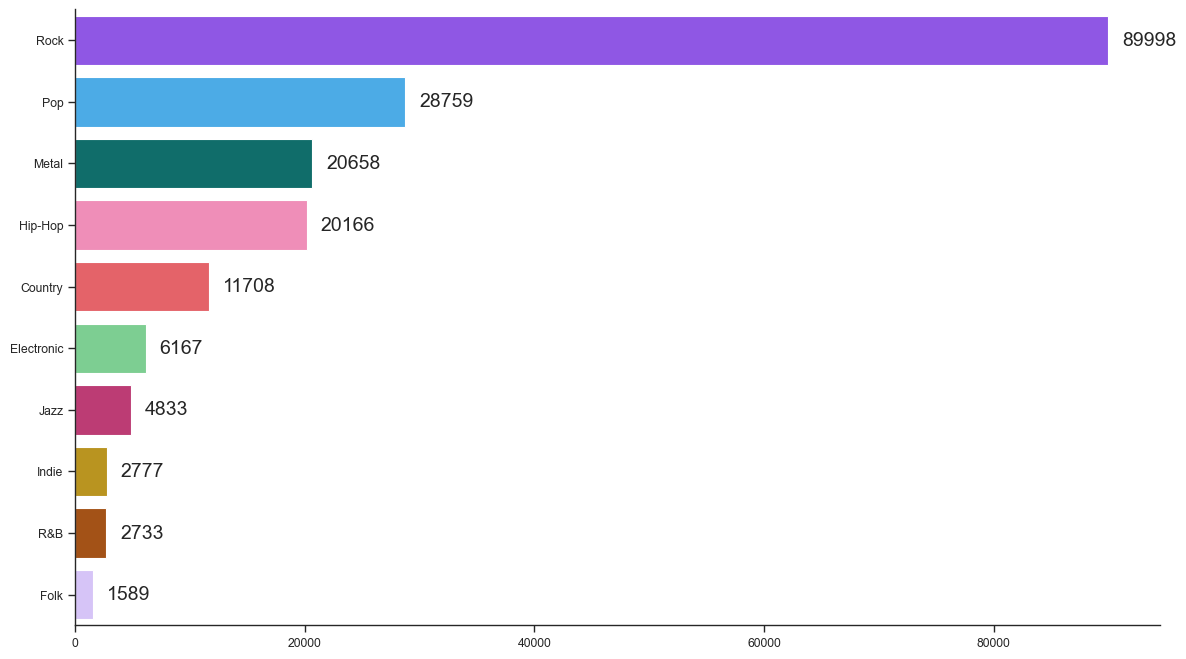

In [ ]:
sns.set_theme(style="ticks")
sns.set_context("paper")
fig, ax0 = plt.subplots(figsize = (14,8))
ax=sns.countplot(y=df['genre'], order=df['genre'].value_counts().index, data=df, palette=c)
ax.bar_label(ax.containers[0], label_type='edge', fontsize=14, padding=10, bbox=dict(facecolor='white', boxstyle = 'round4'))
ax.set_xlabel('')
ax.set_ylabel('')
sns.despine()
plt.show()

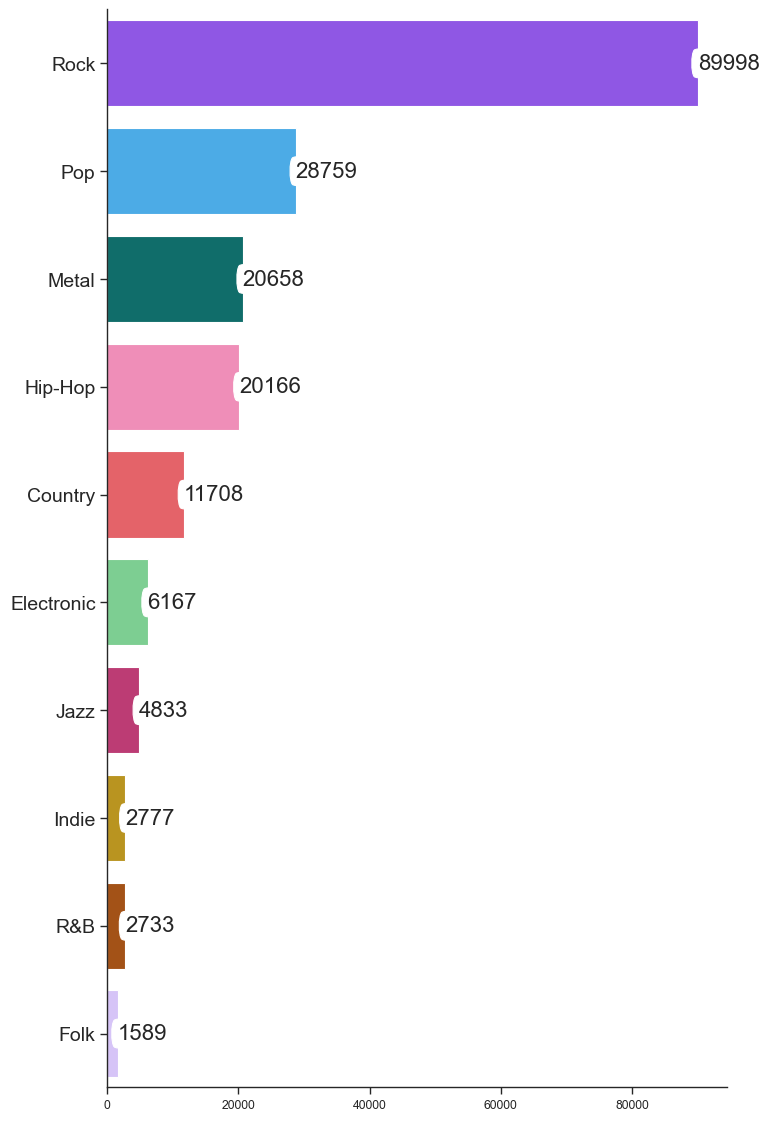

In [ ]:
sns.set_theme(style="ticks")
sns.set_context("paper")
fig, ax0 = plt.subplots(figsize = (8,14))
ax=sns.countplot(y=df['genre'], order=df['genre'].value_counts().index, data=df, palette=c)
ax.bar_label(ax.containers[0], label_type='edge', fontsize=16, padding=0, bbox=dict(facecolor='white', boxstyle = 'round4'))
plt.yticks(fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('')
sns.despine()
plt.show()